In [32]:
from datashield import DSSession, DSLoginBuilder, DSError

In [2]:
url = 'https://opal-demo.obiba.org'
builder = DSLoginBuilder().add('server1', url, 'dsuser', 'P@ssw0rd').add('server2', url, 'dsuser', 'P@ssw0rd')
logins = builder.build()
session = DSSession(logins)


In [3]:
session.open()

In [4]:
session.packages()

{'server1': [{'pkg': 'resourcer', 'version': '1.4.0'},
  {'pkg': 'dsBase', 'version': '6.3.0'}],
 'server2': [{'pkg': 'resourcer', 'version': '1.4.0'},
  {'pkg': 'dsBase', 'version': '6.3.0'}]}

In [5]:
session.methods()

{'server1': [{'name': 'NROW',
   'class': 'func',
   'value': 'base::NROW',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'asFactorDS1',
   'class': 'func',
   'value': 'dsBase::asFactorDS1',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'asListDS',
   'class': 'func',
   'value': 'dsBase::asListDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'aucDS',
   'class': 'func',
   'value': 'dsBase::aucDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'boxPlotGGDS',
   'class': 'func',
   'value': 'dsBase::boxPlotGGDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'checkNegValueDS',
   'class': 'func',
   'value': 'dsBase::checkNegValueDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'classDS',
   'class': 'func',
   'value': 'dsBase::classDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'colnamesDS',
   'class': 'func',
   'value': 'dsBase::colnamesDS',
   'pkg': 'dsBase',
   'version': '6.3.0'},
  {'name': 'corDS',
   'c

In [6]:
session.tables()

{'server1': ['CNSIM.CNSIM1',
  'CNSIM.CNSIM2',
  'CNSIM.CNSIM3',
  'DASIM.DASIM1',
  'DASIM.DASIM2',
  'DASIM.DASIM3',
  'DISCORDANT.DISCORDANT_STUDY1',
  'DISCORDANT.DISCORDANT_STUDY2',
  'DISCORDANT.DISCORDANT_STUDY3',
  'GREENSPACE.Cohort1_exposome',
  'GREENSPACE.Cohort2_exposome',
  'GREENSPACE.Cohort3_exposome',
  'MEDIATION.UPBdata1',
  'MEDIATION.UPBdata2',
  'MEDIATION.UPBdata3',
  'SURVIVAL.EXPAND_WITH_MISSING1',
  'SURVIVAL.EXPAND_WITH_MISSING2',
  'SURVIVAL.EXPAND_WITH_MISSING3',
  'TESTING.TESTING1',
  'TESTING.TESTING2',
  'TESTING.TESTING3',
  'TITANIC_NEWCOMERS_WORKSHOP.titanic_server_1',
  'TITANIC_NEWCOMERS_WORKSHOP.titanic_server_2',
  'serverDataKey.myKey'],
 'server2': ['CNSIM.CNSIM1',
  'CNSIM.CNSIM2',
  'CNSIM.CNSIM3',
  'DASIM.DASIM1',
  'DASIM.DASIM2',
  'DASIM.DASIM3',
  'DISCORDANT.DISCORDANT_STUDY1',
  'DISCORDANT.DISCORDANT_STUDY2',
  'DISCORDANT.DISCORDANT_STUDY3',
  'GREENSPACE.Cohort1_exposome',
  'GREENSPACE.Cohort2_exposome',
  'GREENSPACE.Cohort3_expo

In [7]:
session.resources()

{'server1': ['OMICS.GSE66351_1',
  'OMICS.GSE66351_2',
  'OMICS.genexpr_BIB',
  'OMICS.genexpr_EDE',
  'OMICS.genexpr_KAN',
  'OMICS.genexpr_MOB',
  'OMICS.genexpr_RHE',
  'OMICS.genexpr_SAB',
  'OMICS.methy_BIB',
  'OMICS.methy_EDE',
  'OMICS.methy_KAN',
  'OMICS.methy_MOB',
  'OMICS.methy_RHE',
  'OMICS.methy_SAB',
  'OMICS.tcga_liver',
  'CADSET-coh1.cadset_1',
  'CADSET-coh2.cadset_2',
  'workshop.GSE40732',
  'workshop.GSE40732_1',
  'workshop.GSE40732_2',
  'dsMTL_Server1.dsLasso_C_X',
  'dsMTL_Server1.dsLasso_C_Y',
  'dsMTL_Server1.dsLasso_R_X',
  'dsMTL_Server1.dsLasso_R_Y',
  'dsMTL_Server1.dsMTL_L21_C_X',
  'dsMTL_Server1.dsMTL_L21_C_Y',
  'dsMTL_Server1.dsMTL_L21_R_X',
  'dsMTL_Server1.dsMTL_L21_R_Y',
  'dsMTL_Server1.dsMTL_Net_C_X',
  'dsMTL_Server1.dsMTL_Net_C_Y',
  'dsMTL_Server1.dsMTL_Net_R_X',
  'dsMTL_Server1.dsMTL_Net_R_Y',
  'dsMTL_Server1.dsMTL_Trace_C_X',
  'dsMTL_Server1.dsMTL_Trace_C_Y',
  'dsMTL_Server1.dsMTL_Trace_R_X',
  'dsMTL_Server1.dsMTL_Trace_R_Y',
  'dsM

In [8]:
session.assign_resource('client', resources = { 'server1': 'RSRC.CNSIM1', 'server2': 'RSRC.CNSIM2' }, asynchronous = False)
session.ls()

{'server1': ['client'], 'server2': ['client']}

In [9]:
session.aggregate('classDS("client")', asynchronous = False)

{'server1': ['SQLResourceClient', 'ResourceClient', 'R6'],
 'server2': ['TidyFileResourceClient',
  'FileResourceClient',
  'ResourceClient',
  'R6']}

In [10]:
session.assign_expr('df', 'as.resource.data.frame(client, strict = TRUE)', asynchronous = False)
session.ls()

{'server1': ['client', 'df'], 'server2': ['client', 'df']}

In [11]:
session.aggregate('classDS("df")', asynchronous = False)

{'server1': 'data.frame', 'server2': 'data.frame'}

In [12]:
session.aggregate('colnamesDS("df")', asynchronous = False)

{'server1': ['id',
  'LAB_TSC',
  'LAB_TRIG',
  'LAB_HDL',
  'LAB_GLUC_ADJUSTED',
  'PM_BMI_CONTINUOUS',
  'DIS_CVA',
  'MEDI_LPD',
  'DIS_DIAB',
  'DIS_AMI',
  'GENDER',
  'PM_BMI_CATEGORICAL'],
 'server2': ['entity_id',
  'DIS_AMI',
  'DIS_CVA',
  'DIS_DIAB',
  'GENDER',
  'LAB_GLUC_ADJUSTED',
  'LAB_HDL',
  'LAB_TRIG',
  'LAB_TSC',
  'MEDI_LPD',
  'PM_BMI_CATEGORICAL',
  'PM_BMI_CONTINUOUS']}

In [13]:
session.aggregate('meanDS(df$LAB_GLUC_ADJUSTED)', asynchronous = False)

{'server1': {'EstimatedMean': 6.12409001097695,
  'Nmissing': 341,
  'Nvalid': 1822,
  'Ntotal': 2163,
  'ValidityMessage': 'VALID ANALYSIS'},
 'server2': {'EstimatedMean': 6.10151761517615,
  'Nmissing': 505,
  'Nvalid': 2583,
  'Ntotal': 3088,
  'ValidityMessage': 'VALID ANALYSIS'}}

In [14]:
session.aggregate('meanDS(df$LAB_GLUC_ADJUSTED)', asynchronous = True)

{'server1': {'EstimatedMean': 6.12409001097695,
  'Nmissing': 341,
  'Nvalid': 1822,
  'Ntotal': 2163,
  'ValidityMessage': 'VALID ANALYSIS'},
 'server2': {'EstimatedMean': 6.10151761517615,
  'Nmissing': 505,
  'Nvalid': 2583,
  'Ntotal': 3088,
  'ValidityMessage': 'VALID ANALYSIS'}}

In [15]:
session.assign_table('df2', tables = { 'server1': 'CNSIM.CNSIM1', 'server2': 'CNSIM.CNSIM2' }, asynchronous = True)
session.ls()

{'server1': ['client', 'df', 'df2'], 'server2': ['client', 'df', 'df2']}

In [43]:
data = session.aggregate('heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, 1)')

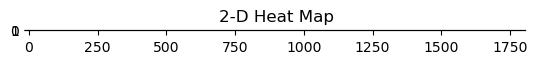

In [44]:
import matplotlib.pyplot as plt
plt.imshow(data['server1'])
plt.title( "2-D Heat Map" )
plt.show()

In [54]:
session.aggregate('rangeDS(df2$LAB_GLUC_ADJUSTED)')

{'server1': [1.77361971157789, 14.5908465142618],
 'server2': [1.03824055661005, 15.3254905345603]}

In [59]:
session.aggregate('histogramDS1(df2$LAB_GLUC_ADJUSTED, method.indicator=1, k=3, noise=0.25)')

{'server1': [1.75937576926231, 14.6756772114094],
 'server2': [1.02990244528804, 15.4145924276482]}

In [62]:
session.aggregate('histogramDS2(df2$LAB_GLUC_ADJUSTED, num.breaks=20, min=0, max=20, method.indicator=1, k=3, noise=0.25)')

{'server1': {'type': 'list',
  'attributes': {'names': {'type': 'character',
    'attributes': {},
    'value': ['histobject', 'invalidcells']}},
  'value': [{'type': 'list',
    'attributes': {'names': {'type': 'character',
      'attributes': {},
      'value': ['breaks', 'counts', 'density', 'mids', 'xname', 'equidist']},
     'class': {'type': 'character', 'attributes': {}, 'value': ['histogram']}},
    'value': [{'type': 'double',
      'attributes': {},
      'value': [0,
       1,
       2,
       3,
       4,
       5,
       6,
       7,
       8,
       9,
       10,
       11,
       12,
       13,
       14,
       15,
       16,
       17,
       18,
       19,
       20]},
     {'type': 'double',
      'attributes': {},
      'value': [0,
       0,
       9,
       60,
       277,
       521,
       558,
       281,
       80,
       9,
       4,
       11,
       5,
       5,
       0,
       0,
       0,
       0,
       0,
       0]},
     {'type': 'double',
      'att

In [61]:
session.get_errors()

{}

In [36]:
try:
  session.aggregate('heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx")', asynchronous = True)
except DSError as e:
  print(session.get_errors())

{'server1': OpalDSError('Command f1f10ee2-7d54-4119-9cf6-0883ece42faf-18 failed on server1: Error while evaluating \'dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx")\' -> Error in dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx") : \n  object \'x.new\' not found\n'), 'server2': OpalDSError('Command 2cfc7644-8200-472b-8d44-415a5c55d60b-18 failed on server2: Error while evaluating \'dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx")\' -> Error in dsBase::heatmapPlotDS(df2$LAB_TSC, df2$LAB_HDL, 3, 0.25, "xxx") : \n  object \'x.new\' not found\n')}


In [8]:
session.close()